In [1]:
import anndata as ad
import scanpy as sc
import episcanpy as epi
import numpy as np
import episcanpy
print(episcanpy.__version__)
import matplotlib.pyplot as plt
import time


# key parameters
nb_of_features = 125000
nb_pcs = 50
n_neighbors = 15
target_sum=None
min_cells =10

# specify the directory where data are stored
DATADIR = '../../input/'

# specify the directory where data and metadata are stored
METADATADIR = '../../input/'

0.2.2+30.g44d02dc


In [2]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')



# Load the raw count matrix + annotations/metadata

In [3]:
start = time.time()

In [5]:
adata = ad.read(DATADIR+'buenrostro_raw_peak_mtx.h5ad')
adata

AnnData object with n_obs × n_vars = 2034 × 237449
    uns: 'omic'

In [6]:
# load annotations and format cell names
adata.obs['original_cell_names'] = adata.obs_names.tolist()

# format cell_names
tmp_cell_names = []
for cell_names in adata.obs_names.tolist():
    cell_names = cell_names.split('/')[-1]
    cell_names = cell_names.rstrip('.dedup.st.bam')
    tmp_cell_names.append(cell_names)
adata.obs['cell_names'] = tmp_cell_names   
adata.obs_names = tmp_cell_names

# I had to add a name for the cell label column. --> first line now read like this 'label\tcell_type\n'
# instead of this 'label\n' originally
epi.pp.load_metadata(adata,
                     metadata_file='metadata.tsv',
                     path=METADATADIR,
                     separator='\t')
adata

AnnData object with n_obs × n_vars = 2034 × 237449
    obs: 'original_cell_names', 'cell_names', 'label', 'cell_type'
    uns: 'omic'

In [7]:

np.max(adata.X)

1.0

        Or use epi.pp.density_features.
    


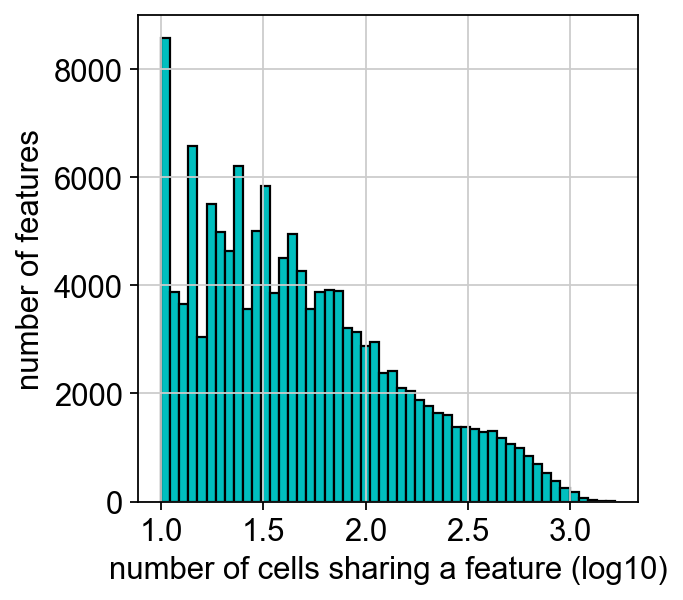

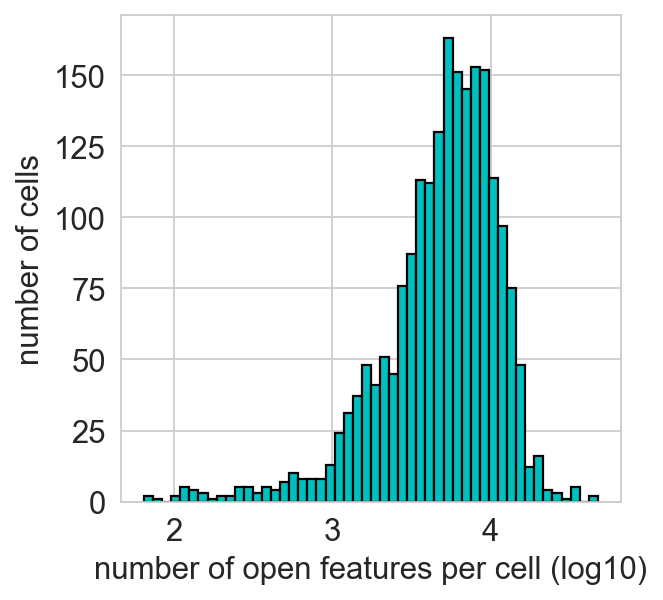

In [8]:
# Quality controls and Preliminary data processing

#binarize
epi.pp.binarize(adata)

### remove empty cells and empty features
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=min_cells)

epi.pp.commonness_features(adata, binary=True, log=True)
epi.pp.coverage_cells(adata, binary=True, log=True)


In [9]:
adata

AnnData object with n_obs × n_vars = 2034 × 135258
    obs: 'original_cell_names', 'cell_names', 'label', 'cell_type', 'nb_features'
    var: 'n_cells', 'commonness'
    uns: 'omic'

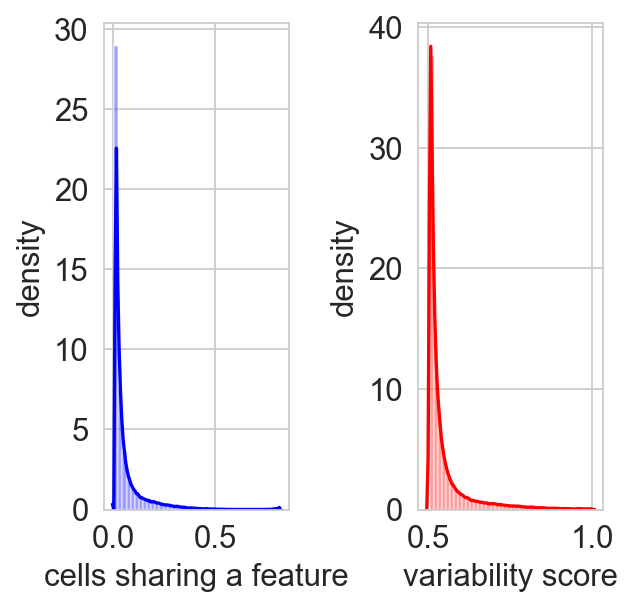

        Or use epi.pp.density_features.
    
Trying to set attribute `.var` of view, copying.


View of AnnData object with n_obs × n_vars = 2034 × 126686
    obs: 'original_cell_names', 'cell_names', 'label', 'cell_type', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic'


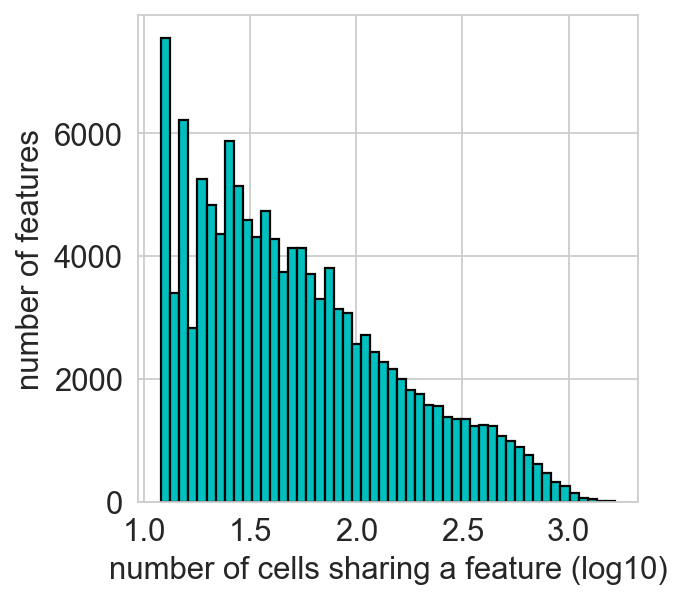

In [10]:
adatareduced = epi.pp.select_var_feature(adata, nb_features=nb_of_features, copy=True)
print(adatareduced)

epi.pp.commonness_features(adatareduced, binary=True, log=True)

epi.pp.normalize_total(adatareduced)
sc.pp.log1p(adatareduced)



In [11]:
adatareduced

AnnData object with n_obs × n_vars = 2034 × 126686
    obs: 'original_cell_names', 'cell_names', 'label', 'cell_type', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic', 'log1p'

# adatareduced

In [12]:
epi.pp.pca(adatareduced, n_comps=nb_pcs, svd_solver='arpack')

In [13]:
sc.pp.neighbors(adatareduced, n_neighbors=n_neighbors, n_pcs=nb_pcs)
epi.tl.umap(adatareduced)
epi.tl.louvain(adatareduced)

... storing 'cell_type' as categorical


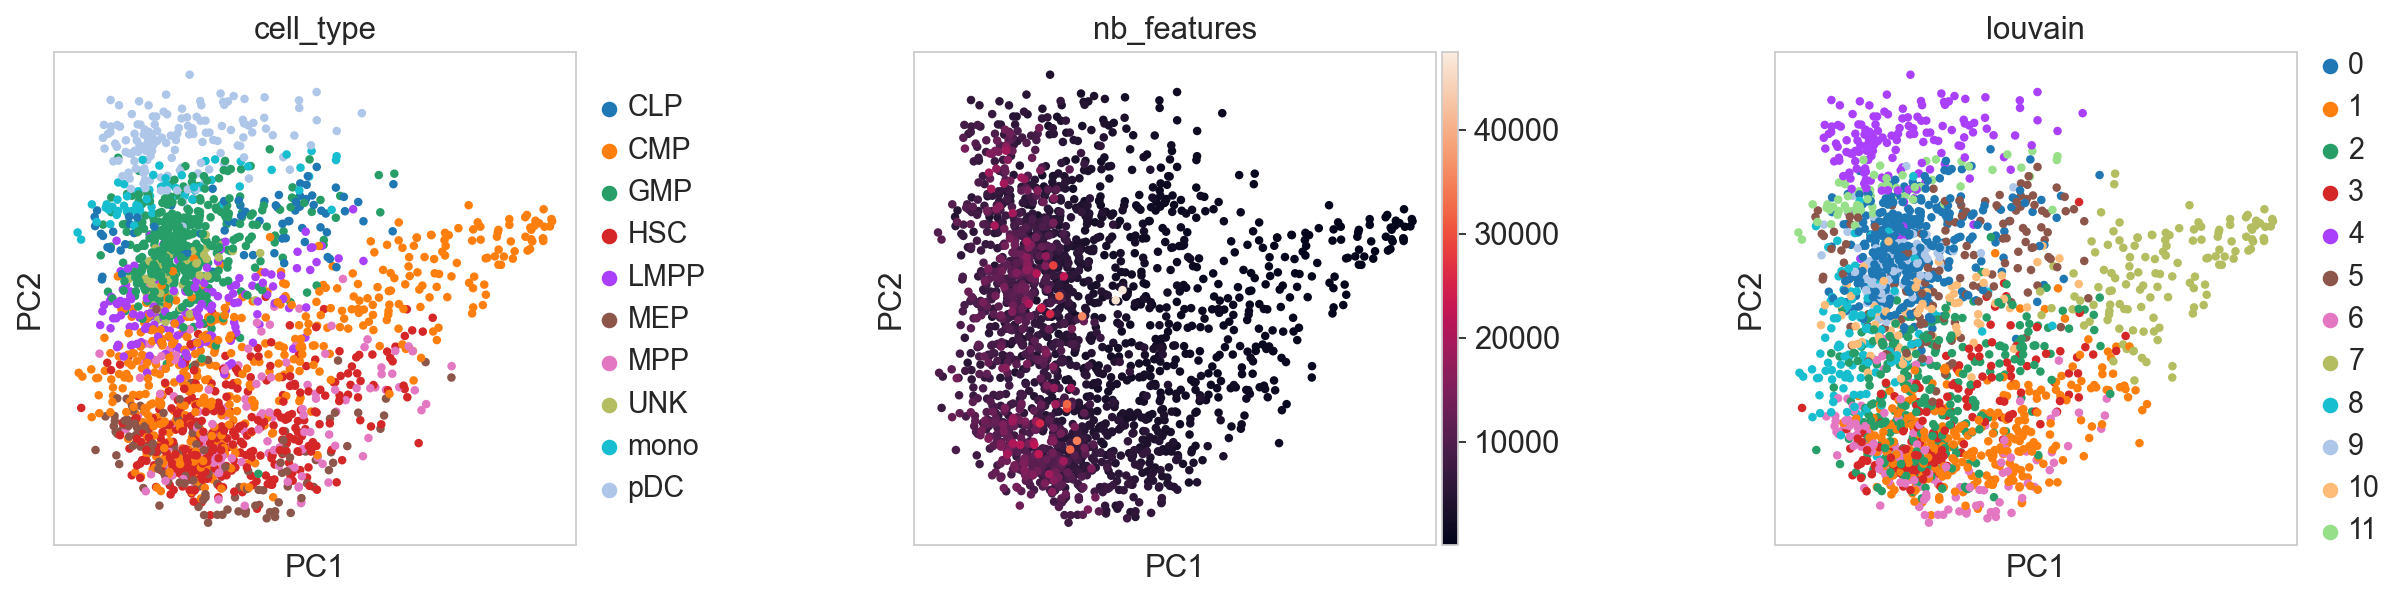

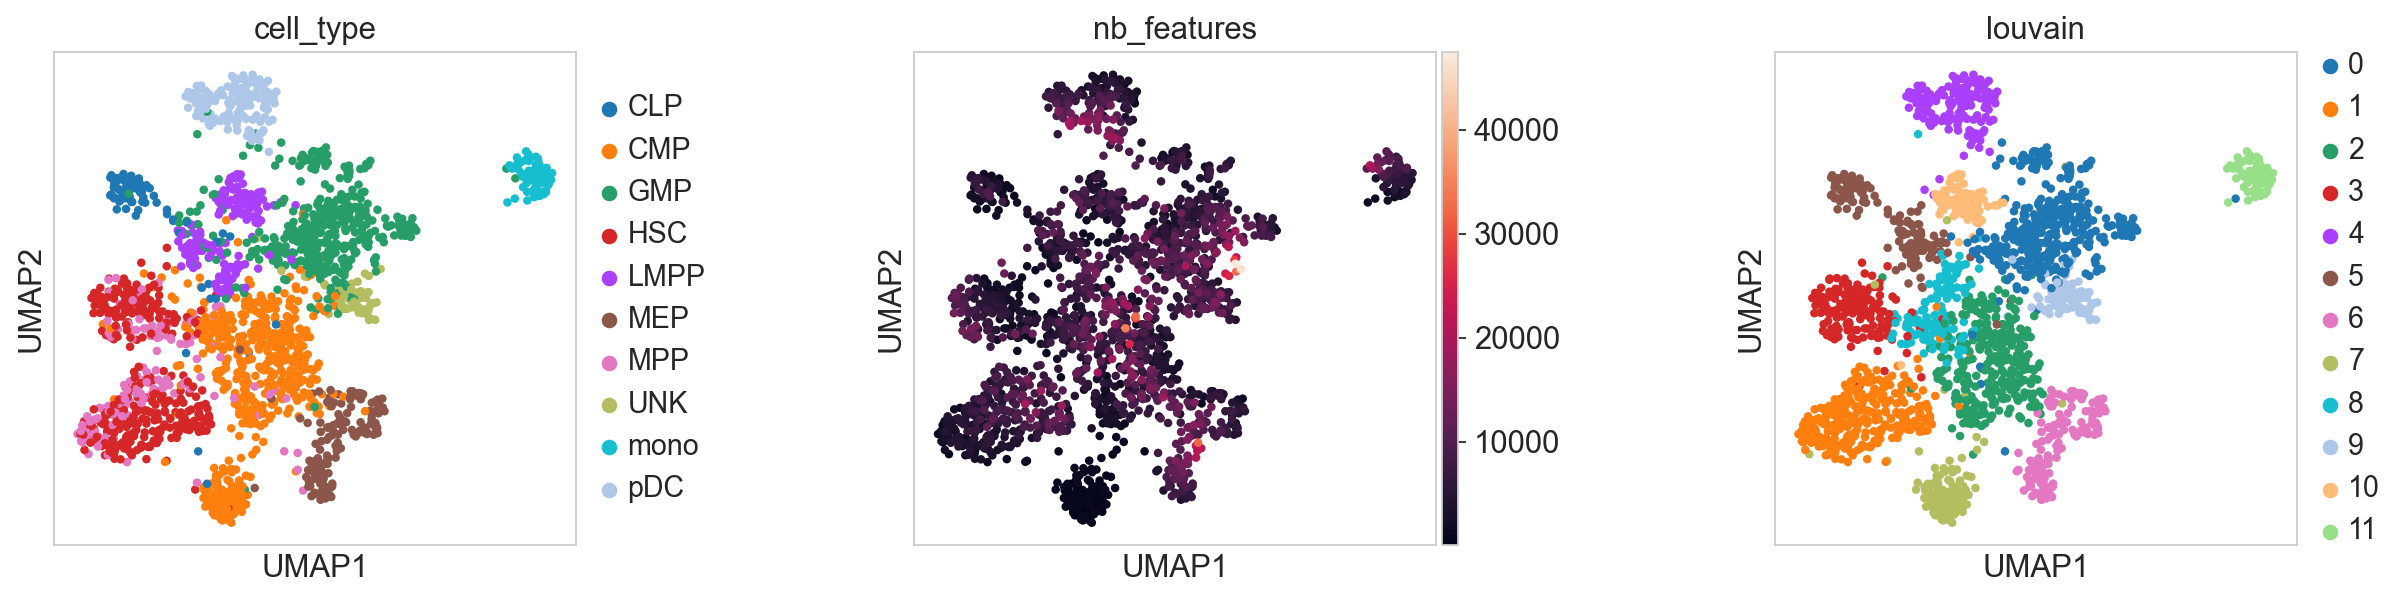

In [14]:
sc.pl.pca(adatareduced, color=['cell_type', 'nb_features', 'louvain'], wspace=0.5)
#sc.pl.tsne(adatareduced, color=['cell_type', 'nb_features', 'louvain'], wspace=0.5)
sc.pl.umap(adatareduced, color=['cell_type', 'nb_features', 'louvain'], wspace=0.5)

In [15]:
adatareduced.write('processed_buenrostro.h5ad')

In [16]:
end = time.time()
print((end-start)/60.0)

3.238491447766622
